Messages: 563740


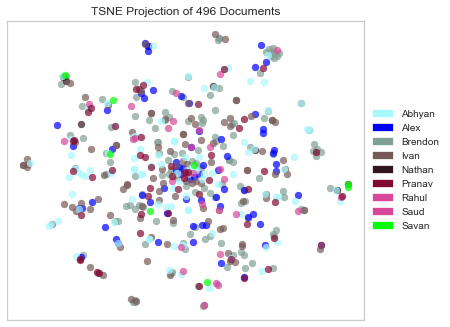

In [13]:
import json
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

obj = None
messages = None

with open("./message.json", "r") as f:
    obj = json.loads(f.read())
    messages = obj["messages"]
    
    print("Messages: %d" % len(messages))
    
    # sort data and targets
    data, target = [], []
    for i in messages[-500:] :
        if "content" in i:
            data.append(i["content"]) # clean data
            target.append(i["sender_name"].split()[0])
    
    # TFIDF on data
    docs = TfidfVectorizer().fit_transform(data)
    tsne = TSNEVisualizer(colors=['#A8F9FF', '#0000FF', '#81A094', '#775B59', '#32161F', 
                                  '#820933', '#D84797', '#D84797', '#00FF00', '#26FFE6', '#B4EDD2'])
    tsne.fit(docs, target)
    tsne.show()
    